<a href="https://colab.research.google.com/github/tamnhu2913/Classification-EMNIST/blob/main/Classification_EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries



In [ ]:
from google.colab import userdata
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, f1_score
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Download data from Kaaggle
Link of data: https://www.kaggle.com/datasets/crawford/emnist/data

In [ ]:
!pip install kaggle
!pip install google.colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00


In [ ]:
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
#download and unzip emnist.zip
!kaggle datasets download -d crawford/emnist
! mkdir EMNIST
! unzip 'emnist.zip' -d EMNIST

Dataset URL: https://www.kaggle.com/datasets/crawford/emnist
License(s): CC0-1.0
 99% 1.23G/1.24G [00:14<00:00, 102MB/s] 
100% 1.24G/1.24G [00:14<00:00, 90.7MB/s]
Archive:  emnist.zip
  inflating: EMNIST/emnist-balanced-mapping.txt  
  inflating: EMNIST/emnist-balanced-test.csv  
  inflating: EMNIST/emnist-balanced-train.csv  
  inflating: EMNIST/emnist-byclass-mapping.txt  
  inflating: EMNIST/emnist-byclass-test.csv  
  inflating: EMNIST/emnist-byclass-train.csv  
  inflating: EMNIST/emnist-bymerge-mapping.txt  
  inflating: EMNIST/emnist-bymerge-test.csv  
  inflating: EMNIST/emnist-bymerge-train.csv  
  inflating: EMNIST/emnist-digits-mapping.txt  
  inflating: EMNIST/emnist-digits-test.csv  
  inflating: EMNIST/emnist-digits-train.csv  
  inflating: EMNIST/emnist-letters-mapping.txt  
  inflating: EMNIST/emnist-letters-test.csv  
  inflating: EMNIST/emnist-letters-train.csv  
  inflating: EMNIST/emnist-mnist-mapping.txt  
  inflating: EMNIST/emnist-mnist-test.csv  
  inflating: EM

# Slipt data and Show data

In [ ]:
#read data in folder EMNIST
data = pd.read_csv('/content/EMNIST/emnist-letters-train.csv',header=None)
test_data = pd.read_csv('/content/EMNIST/emnist-letters-test.csv',header=None)
print('Shape of emnist-letters-train.csv: ',data.shape)
print('Shape of emnist-letters-test.csv: ',test_data.shape)

Shape of emnist-letters-train.csv:  (88800, 785)
Shape of emnist-letters-test.csv:  (14800, 785)


In [ ]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(data.values[:,1:], data.values[:,0], test_size=0.2, random_state = 42)
x_test = test_data.values[:,1:] #(14800, 784)
y_test = test_data.values[:,0]  #(14800, 1)
print('Total of Training sets: ', x_train.shape[0])
print('Total of Validation sets: ', x_val.shape[0])
print('Total of Test sets: ', x_test.shape[0])
print('The range of values of x: (%d,%d)' %(np.min(x_train), np.max(x_train)))
print('Values of y: ', np.unique(y_train))

Total of Training sets:  71040
Total of Validation sets:  17760
Total of Test sets:  14800
The range of values of x: (0,255)
Values of y:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


In [ ]:
def resize_and_rotate(x):
  image = x.reshape(x.shape[0],28,28).astype('float32') #(x.shape[0],784) into (x.shape[0],28,28)
  image = np.expand_dims(image, axis = -1) #(x.shape[0],28,28) into (x.shape[0],28,28,1)
  image = np.fliplr(image)
  image = np.rot90(image, axes=(2,1))
  return image

In [ ]:
x_train = resize_and_rotate(x_train)
x_val = resize_and_rotate(x_val)
x_test = resize_and_rotate(x_test)

In [ ]:
# read image function
def read_image_rot(data,label,name):
  fig, axes = plt.subplots(2,5, figsize=(10,5))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i],cmap='gray')
    ax.set_title("%c,%d" %(chr(96+label[i]),label[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
  plt.suptitle(name)

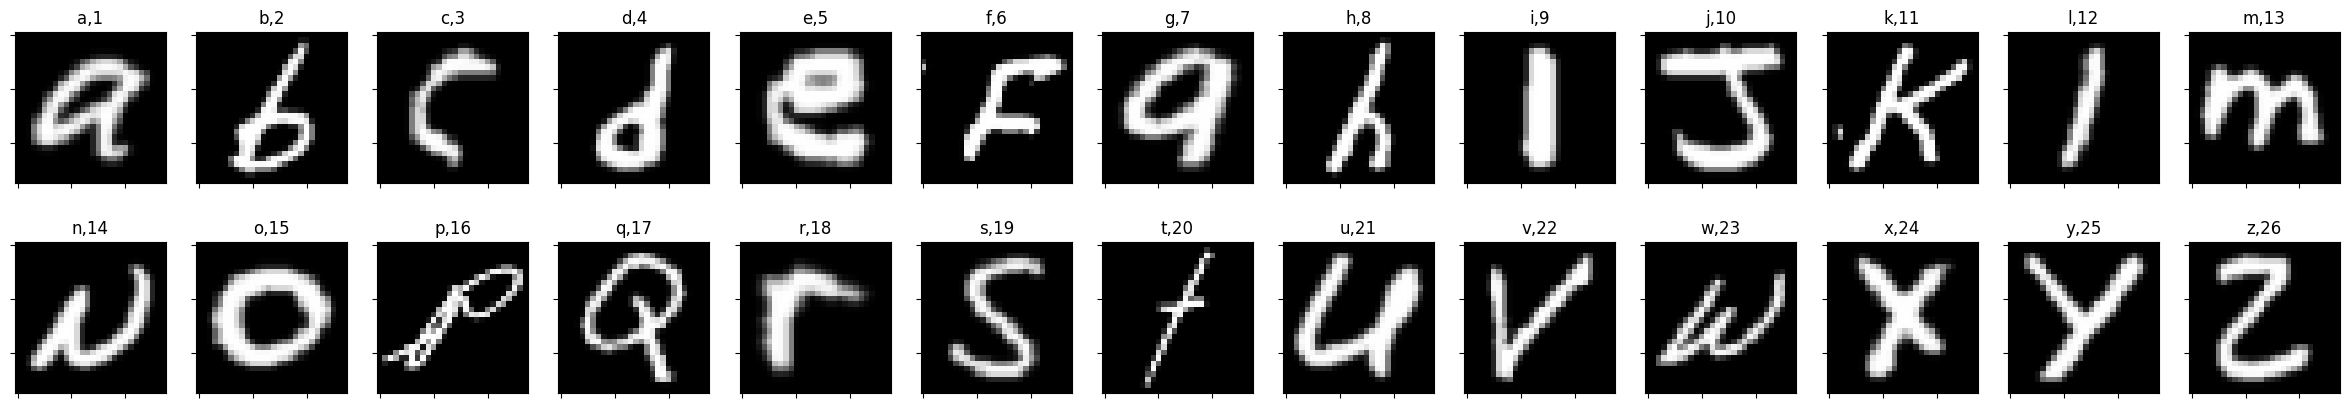

In [ ]:
# Visualize data of Traning set: Show an image of each letter in traning set randomly
rand = []
for i in np.unique(y_train):
  ind = np.where(y_train == i)[0]
  rand.append(random.choice(ind))

fig, axes = plt.subplots(2,13, figsize = (30,5))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[rand[i]], cmap='gray')
  ax.set_title("%c,%d" %(chr(96+y_train[rand[i]]),y_train[rand[i]]))
  ax.set_xticklabels([])
  ax.set_yticklabels([])

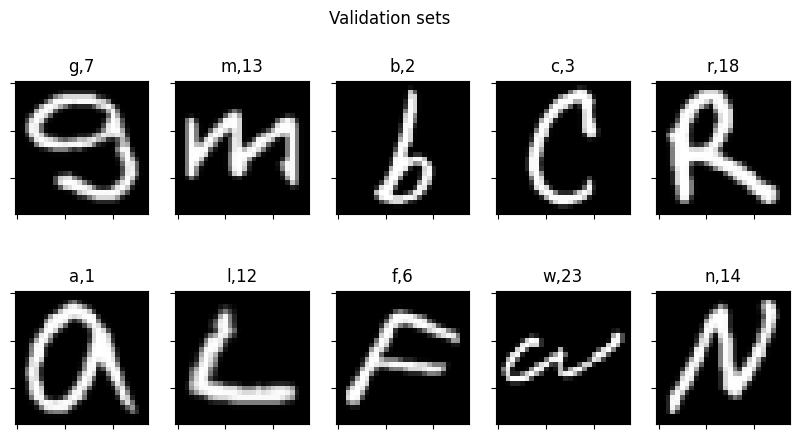

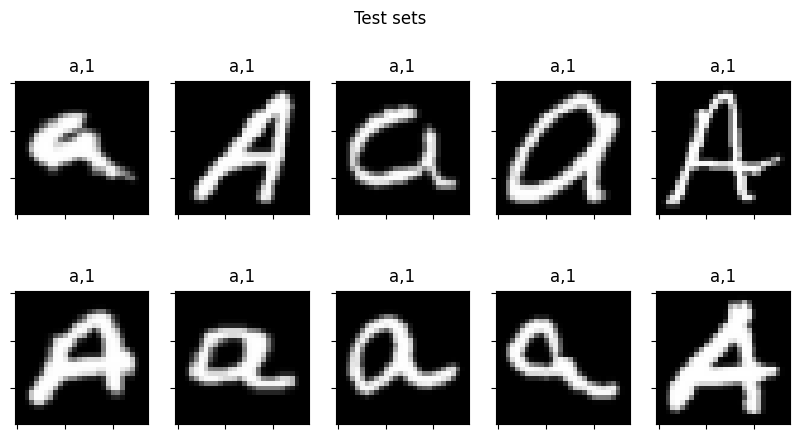

In [ ]:
# Visualize data of Validation set and Test set
read_image_rot(x_val[:10], y_val[:10],'Validation sets')
read_image_rot(x_test[:10], y_test[:10],'Test sets')

# Transform label and Normalize data

In [ ]:
number_of_classes = len(np.unique(y_train))+1
y_train = tf.keras.utils.to_categorical(y_train, number_of_classes)
y_val = tf.keras.utils.to_categorical(y_val, number_of_classes)
y_test = tf.keras.utils.to_categorical(y_test, number_of_classes)

In [ ]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test/ 255.0

# Define model


* 1 Input layer with shape = (28,28,1).
* 3 Convolution layers with 32, 64 and 128 units repesctively. The kernel size is 3 and the activation is ReLU function.
* 1 MaxPooling layer.
* 1 Flatten layer.
* 3 Dense layers: The first 2 layers have 512 and 128 units repectively with ReLU function. The last is Output layer, with unites equal to the number of lettes and the activation is Softmax function.



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(number_of_classes, activation= 'softmax'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 512)               7930368   
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, verbose=1)

Epoch 1/15
2220/2220 [==============================] - 27s 9ms/step - loss: 0.4033 - accuracy: 0.8716 - val_loss: 0.2420 - val_accuracy: 0.9181
Epoch 2/15
2220/2220 [==============================] - 19s 9ms/step - loss: 0.1905 - accuracy: 0.9341 - val_loss: 0.2102 - val_accuracy: 0.9318
Epoch 3/15
2220/2220 [==============================] - 22s 10ms/step - loss: 0.1350 - accuracy: 0.9492 - val_loss: 0.2215 - val_accuracy: 0.9285
Epoch 4/15
2220/2220 [==============================] - 19s 9ms/step - loss: 0.1053 - accuracy: 0.9590 - val_loss: 0.2247 - val_accuracy: 0.9324
Epoch 5/15
2220/2220 [==============================] - 22s 10ms/step - loss: 0.0848 - accuracy: 0.9663 - val_loss: 0.2828 - val_accuracy: 0.9294
Epoch 6/15
2220/2220 [==============================] - 21s 9ms/step - loss: 0.0739 - accuracy: 0.9694 - val_loss: 0.2896 - val_accuracy: 0.9289
Epoch 7/15
2220/2220 [==============================] - 21s 9ms/step - loss: 0.0624 - accuracy: 0.9744 - val_loss: 0.2862 - val_

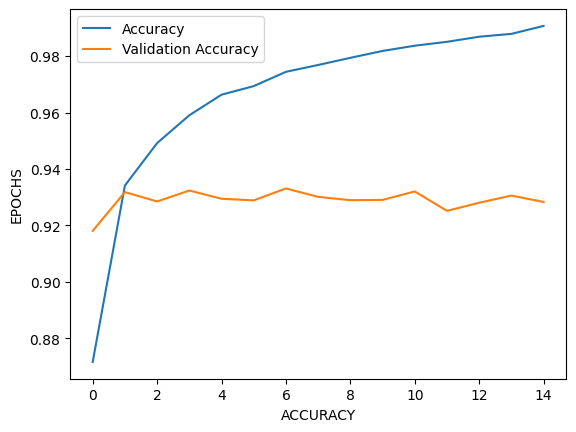

In [ ]:
#Display accuracy of traning set and validation set
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))
plt.figsize =(10,10)
sns.lineplot(x = epoch,y = acc, label='Accuracy')
sns.lineplot(x = epoch, y= val_acc, label='Validation Accuracy')
plt.ylabel('EPOCHS')
plt.xlabel("ACCURACY")
plt.show()

463/463 [==============================] - 2s 3ms/step


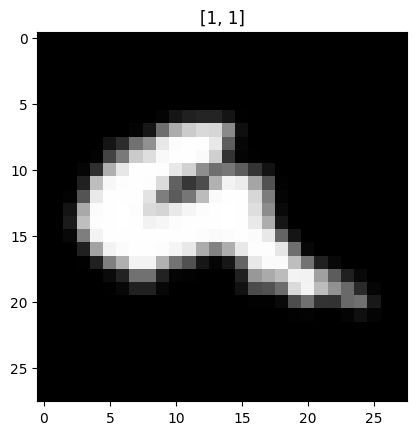

In [ ]:
#Test model with the first element of test set
predict = model.predict(x_test)
plt.imshow(x_test[0], cmap='gray')
plt.title([np.argmax(y_test[0]), np.argmax(predict[0])])
plt.show()

# Display confusion matrix and calculate F1 score

F1 score: 0.93%


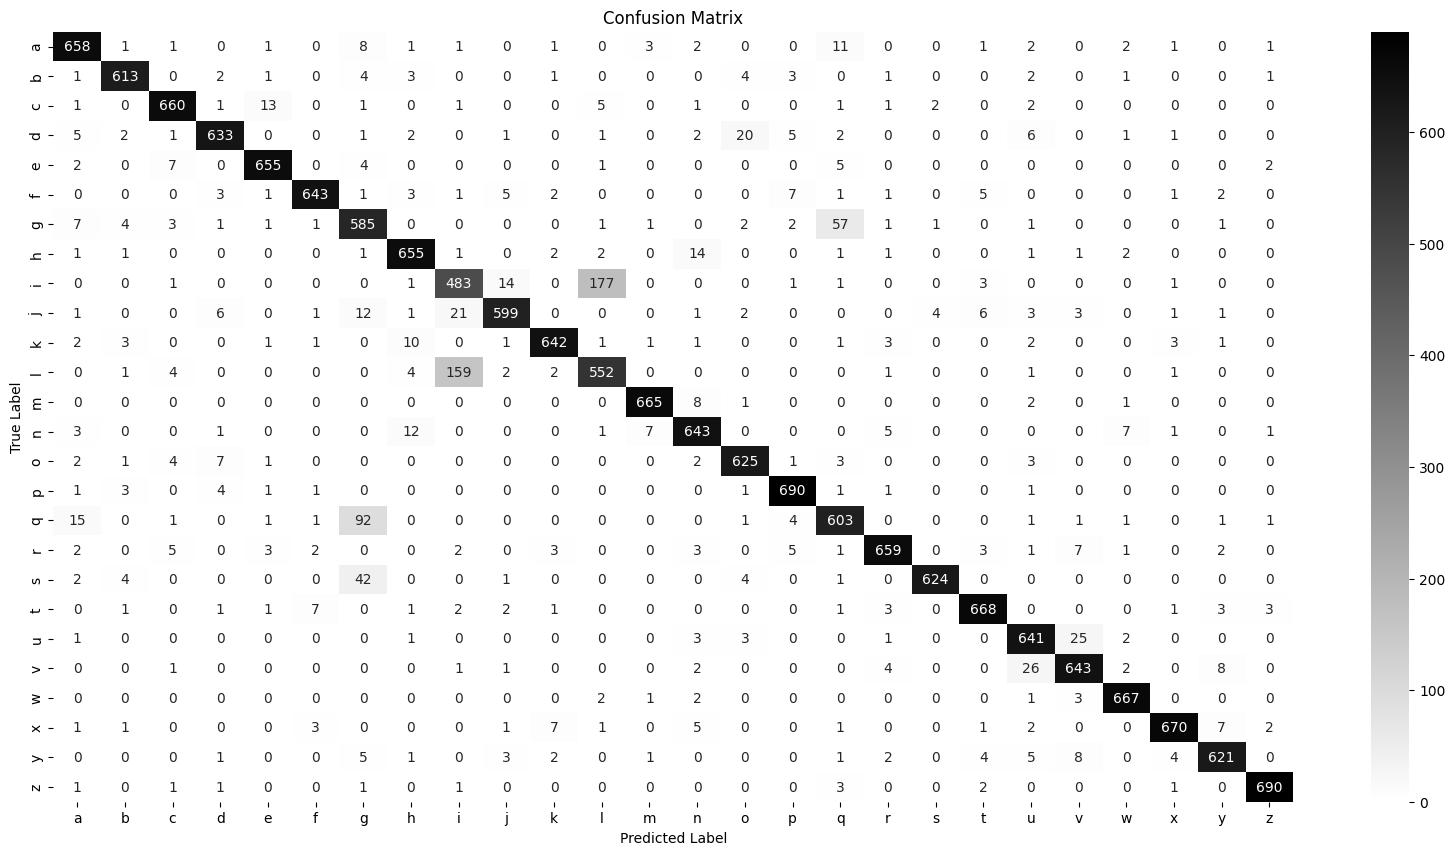

In [ ]:
#Display confusion matrix to see the number of true predictions
Y = np.argmax(y_val, axis = 1)
P = np.argmax(model.predict(x_val, verbose = 0), axis = 1)
f1 = f1_score(Y,P, average ='micro')
print("F1 score: %0.2f%%" %f1)
conf_matrix = confusion_matrix(Y, P)
letter = []
for i in range(1,27):
  letter.append(chr(96+i))
plt.figure(figsize=(20, 10))
sns.heatmap(conf_matrix, annot=True, cmap='binary', fmt= '.0f',xticklabels=letter, yticklabels=letter)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()